In [2]:
import pywanda
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from lib import *
cwd =  r'C:\Users\juan.guerrero\Downloads\wanda\WAVE V6\transient_results'
wanda_bin = r'C:\Program Files (x86)\Deltares\Wanda 4.7\Bin\\'


In [3]:
pipes = ["PIPE PBAB", "PIPE PBUHASA"]  
valves = ["VALVE BAB ESD", "VALVE BH ESD"]
SV = ["DAMPER MIRFA", "DAMPER BAB", "DAMPER BUHASA", "DAMPER BAB EXTRA"]
NODES = ["H-node DC.a", "H-node CF.a"]

# WANDA Unsteady with Mitigation

For pipeline 'PBAB', min pressure: 6.42508375 bar, max pressure: 43.464575 bar
For pipeline 'PBUHASA', min pressure: 2.937388125 bar, max pressure: 24.0888925 bar


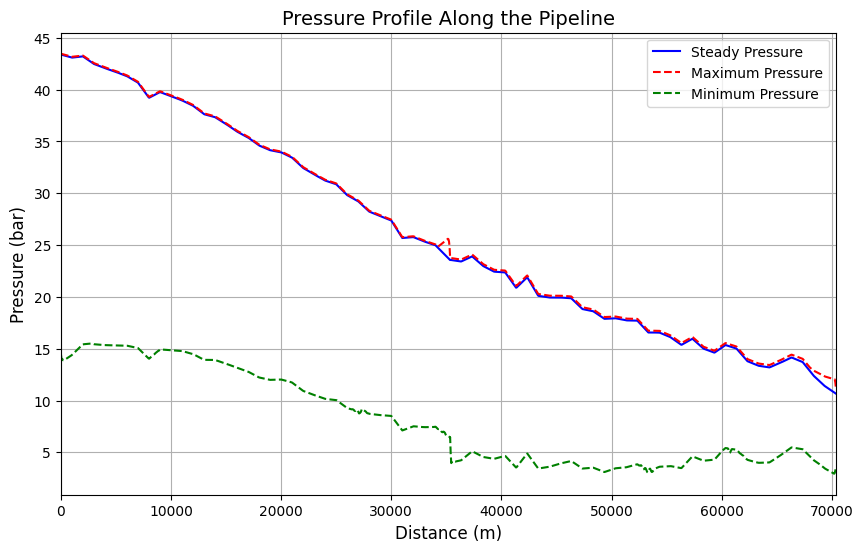

In [27]:
wanda_file01 = os.path.join(cwd, "WAVE-MODEL-1-1.wdi")
wanda_model = pywanda.WandaModel(wanda_file01, wanda_bin)
wanda_model.reload_output()


def get_transient_pressure_df(wanda_model, pipes, downsampling_factor=1, print_messages = True, is_returning_series = False):
    """
    Genera series de presión para tuberías en un modelo Wanda.

    Args:
        wanda_model: Modelo Wanda que contiene los componentes de las tuberías.
        pipes (list): Lista de nombres de tuberías a procesar.
        downsampling_factor (int): Factor de muestreo para reducir el tamaño de las series. 
                                   El valor por defecto es 1 (sin reducción).
        print_messages (Bool): Printea los valores máximos y mínimos de presión en la tubería en el código
        is_returning_serie (Bool): Devuelve los valores de presion tres series de pandas en lugar de dataframe

    Returns:
        tuple: Series de presión estacionaria, mínima y máxima, como pandas.Series.
    """
    # time_steps = wanda_model.get_time_steps()
    length_steps = []
    steady_pressures = []
    max_pressures = []
    min_pressures = []
    for pipe in pipes:
        
        component = wanda_model.get_component(pipe)
        pressure_data = component.get_property("Pressure")
        profile_data = component.get_property("Profile").get_table().get_float_column("X-distance")

        pressure_series = np.array(pressure_data.get_series_pipe()) /100000
        steady_pressures.append(pressure_series[:, 0])
        
        max_pressures.append(np.array(pressure_data.get_extr_max_pipe()) / 100000)
        min_pressures.append(np.array(pressure_data.get_extr_min_pipe()) / 100000)
        
        length_steps.append(np.linspace(profile_data[0], profile_data[-1], len(pressure_series)))
        
        min_pressure = min(pressure_data.get_extr_min_pipe()) / 100000
        max_pressure = max(pressure_data.get_extr_max_pipe()) / 100000
        if print_messages:
            print(f"For pipeline '{component.get_name()}', min pressure: {min_pressure} bar, max pressure: {max_pressure} bar")

    # Convert lists to numpy arrays
    steady_pressures = np.concatenate(steady_pressures)
    max_pressures = np.concatenate(max_pressures)
    min_pressures = np.concatenate(min_pressures)
    length_steps = np.concatenate(length_steps)
    
    if downsampling_factor > 1:
        steady_pressures = steady_pressures[::downsampling_factor]
        max_pressures = max_pressures[::downsampling_factor]
        min_pressures = min_pressures[::downsampling_factor]
        length_steps = length_steps[::downsampling_factor]
        
    if is_returning_series:
        steady_series = pd.Series(steady_pressures, index=length_steps)
        max_series = pd.Series(max_pressures, index=length_steps)
        min_series = pd.Series(min_pressures, index=length_steps)
        
        return steady_series, min_series, max_series
    
    results_dic = {
        'Steady Pressure': steady_pressures,
        'Maximum Pressure': max_pressures,
        'Minimum Pressure': min_pressures,
    }
    
    results_data = pd.DataFrame(results_dic, index=length_steps)
    results_data.index.name = 'Distance (m)'
    
    
    return results_data

df = get_transient_pressure_df(wanda_model, pipes)

def graph_transient_pressures(transientDFv):
    return

# Crear un gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(xlim=(0, df.index[-1]))
ax.plot(df.index, df['Steady Pressure'], label='Steady Pressure', color='blue')
ax.plot(df.index, df['Maximum Pressure'], label='Maximum Pressure', color='red', linestyle='--')
ax.plot(df.index, df['Minimum Pressure'], label='Minimum Pressure', color='green', linestyle='--')

# Personalizar el gráfico
ax.set_title("Pressure Profile Along the Pipeline", fontsize=14)
ax.set_xlabel("Distance (m)", fontsize=12)
ax.set_ylabel("Pressure (bar)", fontsize=12)
ax.legend()
ax.grid()

# Mostrar el gráfico
plt.show()



For the element:  DC.a
The minimum pressure is:  4.0620753125
The maximum pressure is:  16.07796125
For the element:  CF.a
The minimum pressure is:  16.0706625
The maximum pressure is:  46.20324


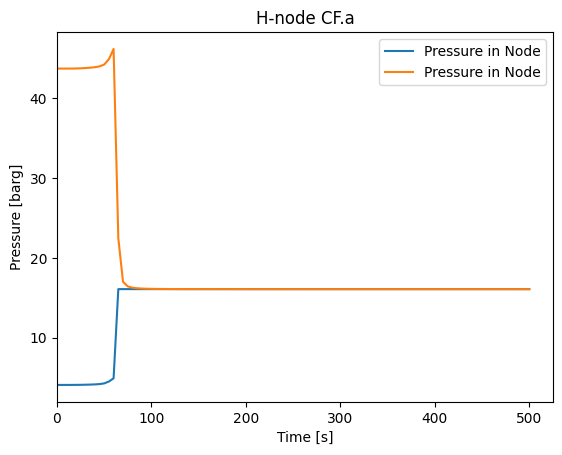

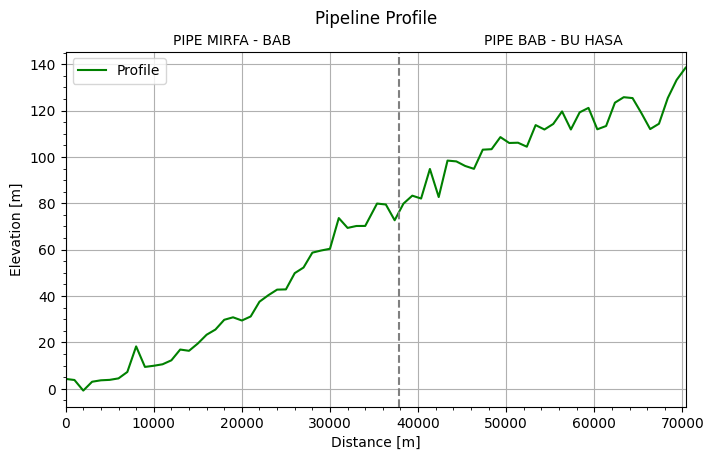

For pipeline  PBAB the minimum pressure is:  6.42508375
For pipeline  PBAB the maximum pressure is:  43.464575
For pipeline  PBUHASA the minimum pressure is:  2.937388125
For pipeline  PBUHASA the maximum pressure is:  24.0888925


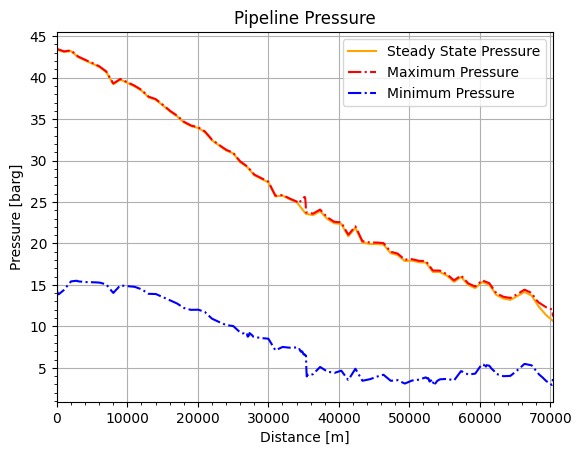

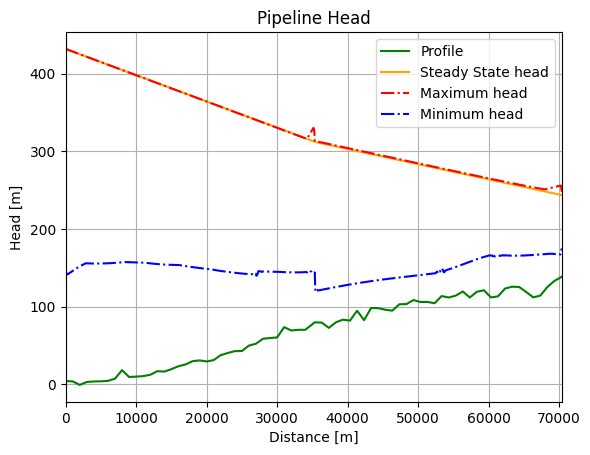

For before the valve  BAB ESD the minimum pressure is:  6.391933125
For before the valve  BAB ESD the maximum pressure is:  23.3176425
For after the valve  BAB ESD the minimum pressure is:  6.391933125
For after the valve  BAB ESD the maximum pressure is:  23.308995
The minimum flow is:  0.0
The maximum flow is:  12110.000324249268
For before the valve  BH ESD the minimum pressure is:  4.1241853125
For before the valve  BH ESD the maximum pressure is:  10.48667875
For after the valve  BH ESD the minimum pressure is:  4.1241853125
For after the valve  BH ESD the maximum pressure is:  10.479451875
The minimum flow is:  0.0
The maximum flow is:  9545.006847381592
The minimum volume for the surge vessel  MIRFA is:  20.9893798828125
The minimum volume for the surge vessel  MIRFA is:  67.75679016113281
The minimum volume for the surge vessel  BAB is:  20.350486755371094
The minimum volume for the surge vessel  BAB is:  69.54582977294922
The minimum volume for the surge vessel  BUHASA is:  33

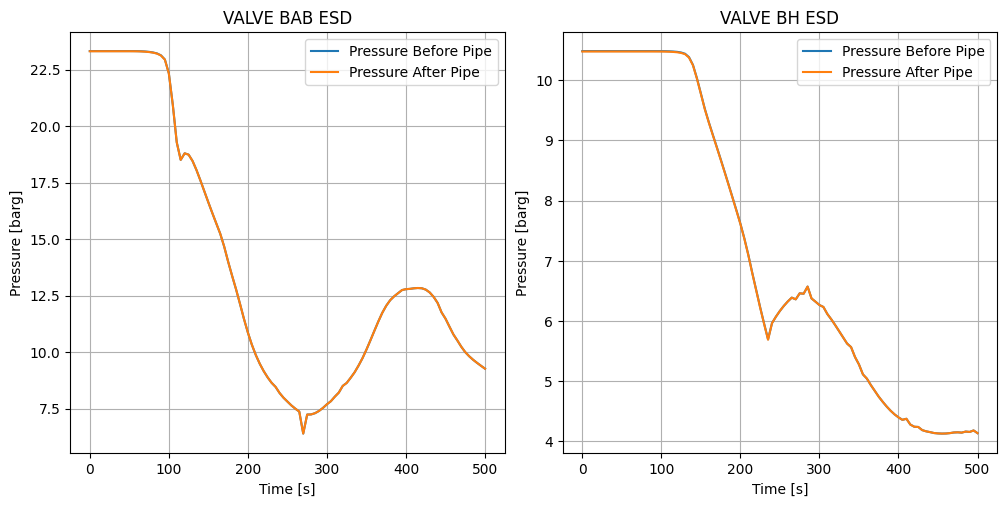

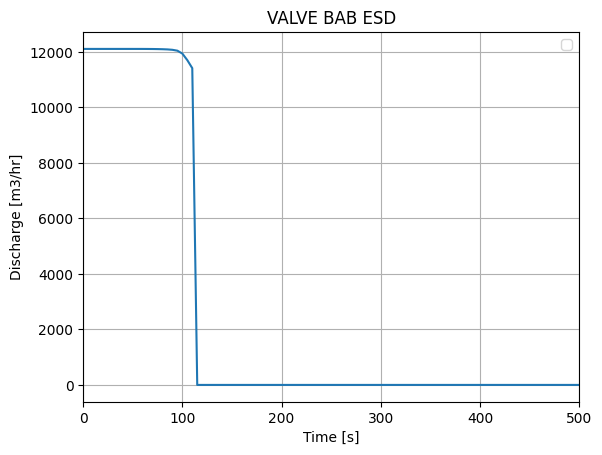

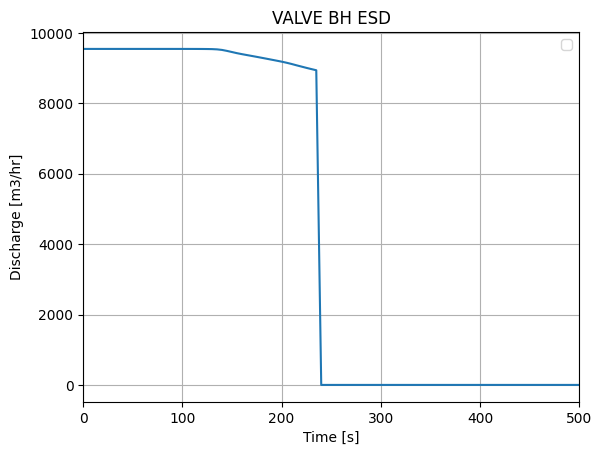

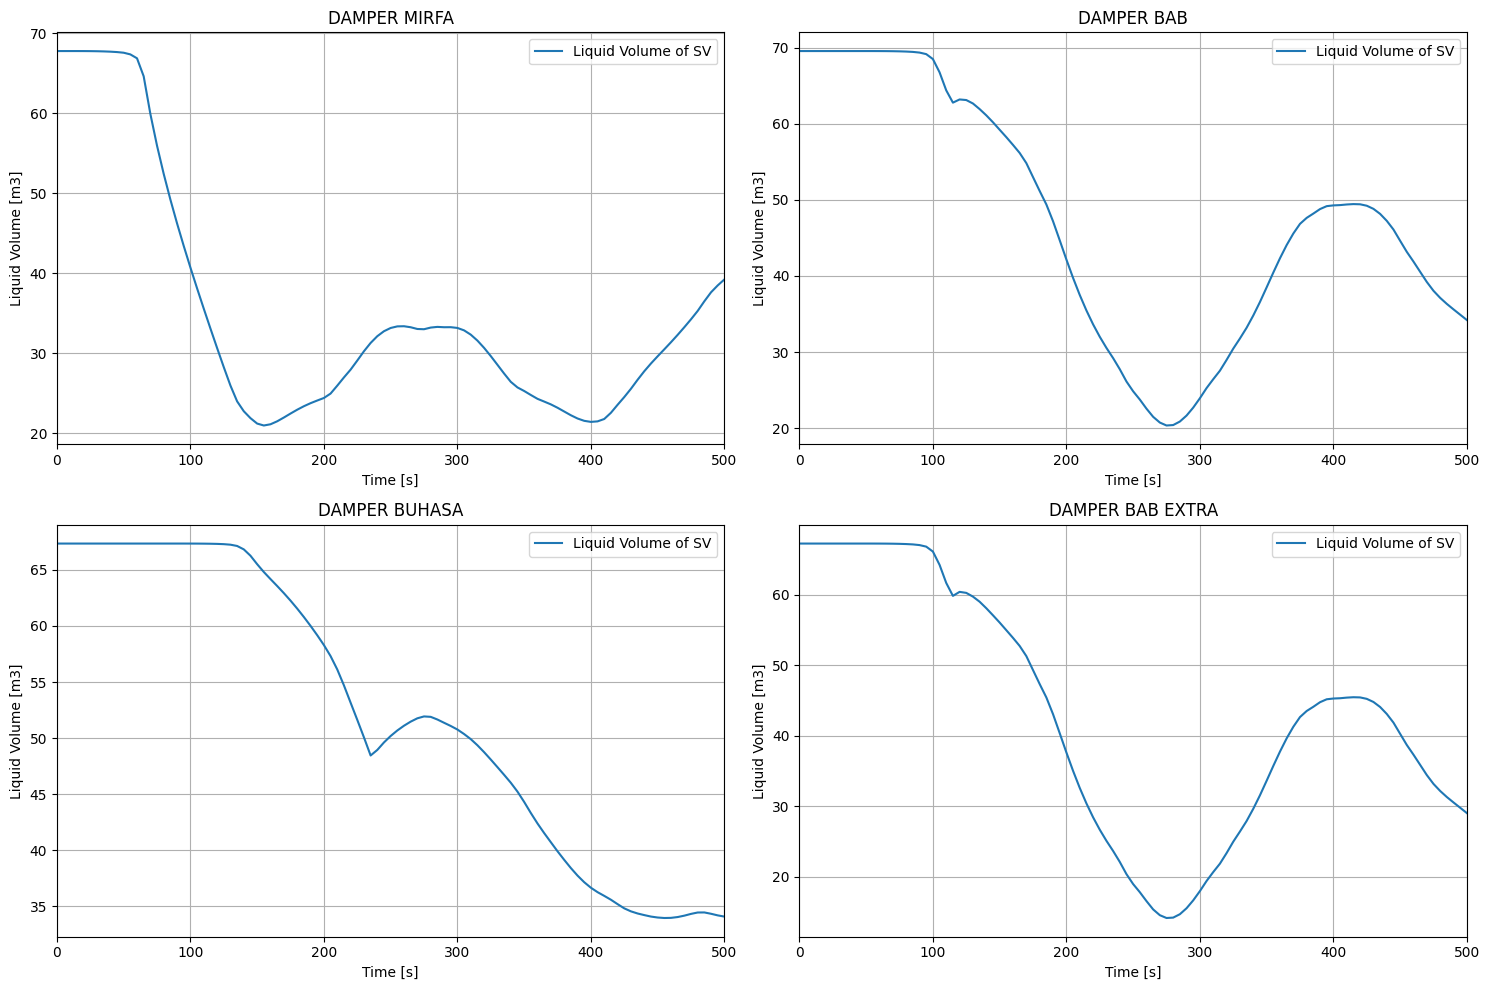

For pipeline  PBAB the minimum pressure is:  6.42508375
For pipeline  PBAB the maximum pressure is:  43.464575
For pipeline  PBUHASA the minimum pressure is:  2.937388125
For pipeline  PBUHASA the maximum pressure is:  24.0888925
For pipeline  PBAB the minimum pressure is:  6.334413125
For pipeline  PBAB the maximum pressure is:  43.464575
For pipeline  PBUHASA the minimum pressure is:  3.0472321875
For pipeline  PBUHASA the maximum pressure is:  23.96974
For pipeline  PBAB the minimum pressure is:  9.0347875
For pipeline  PBAB the maximum pressure is:  43.464575
For pipeline  PBUHASA the minimum pressure is:  5.60332
For pipeline  PBUHASA the maximum pressure is:  23.969735


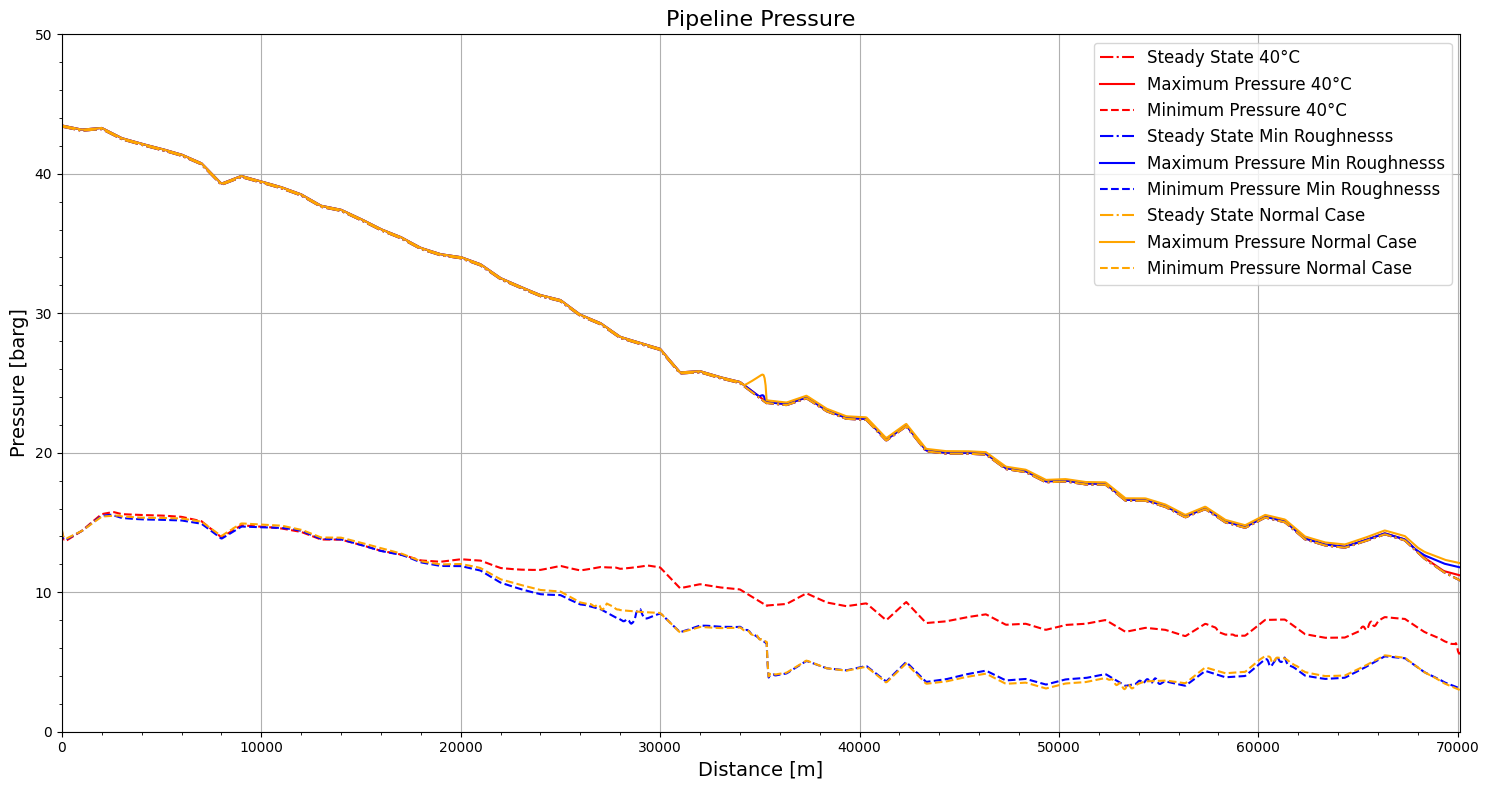

In [6]:
wanda_file01 = os.path.join(cwd, "WAVE-MODEL-1-1.wdi")
wanda_file02 = os.path.join(cwd, "WAVE-MODEL-1-2.wdi")
wanda_file03 = os.path.join(cwd, "WAVE-MODEL-1-3.wdi")
wanda_model = pywanda.WandaModel(wanda_file01, wanda_bin)
wanda_model.reload_output()
# wanda_model.run_unsteady()

print("\n")


get_info_nodes(wanda_model, NODES)
get_profile(wanda_model, pipes)
get_pipe_pressure_graphs(wanda_model, pipes)
get_pipe_head_graphs(wanda_model, pipes)
get_pressure_valves(wanda_model, valves)
get_surge_vessels_info(wanda_model, SV)

steady1, min1, max1 = get_pressure_series(wanda_model, pipes)

wanda_model = pywanda.WandaModel(wanda_file02, wanda_bin)
wanda_model.reload_output()
steady2, min2, max2 = get_pressure_series(wanda_model, pipes)

wanda_model = pywanda.WandaModel(wanda_file03, wanda_bin)
wanda_model.reload_output()
steady3, min3, max3 = get_pressure_series(wanda_model, pipes)

fig, bx = plt.subplots(figsize=(15, 8))

# Graficar los datos con diferentes estilos y colores

bx.plot(steady3, label="Steady State 40°C", color="red", linestyle="dashdot")
bx.plot(max3, label="Maximum Pressure 40°C ", color="red")
bx.plot(min3, label="Minimum Pressure 40°C ", color="red", linestyle="dashed")

bx.plot(steady2, label="Steady State Min Roughnesss", color="blue", linestyle="dashdot")
bx.plot(max2, label="Maximum Pressure Min Roughnesss", color="blue")
bx.plot(min2, label="Minimum Pressure Min Roughnesss", color="blue", linestyle="dashed")

bx.plot(steady1, label="Steady State Normal Case", color="orange", linestyle="dashdot")
bx.plot(max1, label="Maximum Pressure Normal Case", color="orange")
bx.plot(min1, label="Minimum Pressure Normal Case", color="orange", linestyle="dashed")
# Configurar los límites del gráfico
bx.set_xlim(0, 70120)
bx.set_ylim(0, 50)

# Añadir etiquetas y título
bx.set_xlabel("Distance [m]", fontsize=14)
bx.set_ylabel("Pressure [barg]", fontsize=14)
plt.title("Pipeline Pressure", fontsize=16)

# Añadir rejilla y leyenda
bx.grid(True)
bx.minorticks_on()
plt.legend(fontsize=12)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()